<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/Perceptr%C3%B3n/LabPerceptr%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio - Perceptrón

*   Mauricio Calderón
*   Mario Araya





1. Programe el algoritmo del perceptrón genérico que reciba cualquier set de datos 

In [87]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        print("Peso inicial " + str(self.weights) + " Bias inicial " + str(self.bias))
        for i in range(self.max_iter):
            print("Iteracion numero " + str(i))
            y_pred = np.dot(X, self.weights) + self.bias
            y_pred = np.where(y_pred > 0, 1, -1)

            if i == self.max_iter-1:
              print("Maximo de iteraciones alcanzadas!")
              break

            if np.array_equal(y_pred, y):
                print(f"Converge en {i+1} iteraciones")
                break
            else:
                error = y - y_pred
                self.weights += self.learning_rate * np.dot(X.T, error)
                self.bias += self.learning_rate * np.sum(error)
                print("Calculo del error " + str(np.sum(error)) + " Peso actualizado" + str(self.weights) + " Bias actualizado " + str(self.bias))

        print("Algoritmo finalizado")
        
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        y_pred = np.where(y_pred > 0, 1, -1)
        return y_pred

2. Ejecute el programa con un set de datos de al menos 1000 observaciones y 3 características

In [85]:
import numpy as np
from sklearn import datasets

# Establecer la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Generar un conjunto de datos aleatorios con 1000 observaciones y 3 características lineales
x1 = np.random.randint(-1000, 1000, 1000)
x2 = np.random.randint(-1000, 1000, 1000)
x3 = np.random.randint(-1000, 1000, 1000)



dataset = np.column_stack((x1, x2, x3))
random_list = np.random.choice([-1, 1], size=1000)

test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
result = np.array([-1, -1, -1, 1])


perceptron = Perceptron(learning_rate=0.1, max_iter=100)
perceptron.fit(np.array(dataset), np.array(random_list))

perceptron = Perceptron(learning_rate=0.1, max_iter=100)
perceptron.fit(np.array(test), np.array(result))





Peso inicial [0. 0. 0.] Bias inicial 0
Iteracion numero 0
Calculo del error 1048 Peso actualizado[ 1982.6 -5097.2   953.8] Bias actualizado 104.80000000000001
Iteracion numero 1
Calculo del error -6 Peso actualizado[-11757.6  39584.4  -5376.4] Bias actualizado 104.20000000000002
Iteracion numero 2
Calculo del error 90 Peso actualizado[ -4454.  -12446.2   -239.4] Bias actualizado 113.20000000000002
Iteracion numero 3
Calculo del error 46 Peso actualizado[ 5297.6 32992.2  2514.6] Bias actualizado 117.80000000000001
Iteracion numero 4
Calculo del error 62 Peso actualizado[ -2264.8 -19783.8  -1556.8] Bias actualizado 124.00000000000001
Iteracion numero 5
Calculo del error 32 Peso actualizado[ -241.6 27381.4  2434.4] Bias actualizado 127.20000000000002
Iteracion numero 6
Calculo del error 80 Peso actualizado[ -1478.6 -26029.2   -654.6] Bias actualizado 135.20000000000002
Iteracion numero 7
Calculo del error 22 Peso actualizado[-1731.8 21466.2   744.6] Bias actualizado 137.4
Iteracion numero

3. Gráfique los datos del punto 2 con un plano que evidencie la separación de los datos y las observaciones

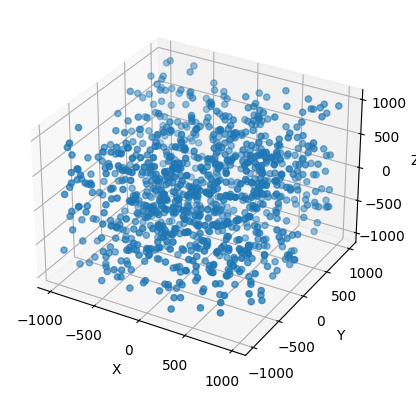

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def graficar_3d(x, y, z):
    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar puntos en 3D
    ax.scatter(x, y, z)

    # Configurar etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Mostrar gráfico
    plt.show()

graficar_3d(x1,x2,x3)